<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 🔧 Instrucciones

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


In [2]:
 # Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Paso 2: Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### Distribución de Clases

,count
1,357
0,212


/tmp/ipython-input-886054896.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_names, y=class_distribution.values, palette='viridis')


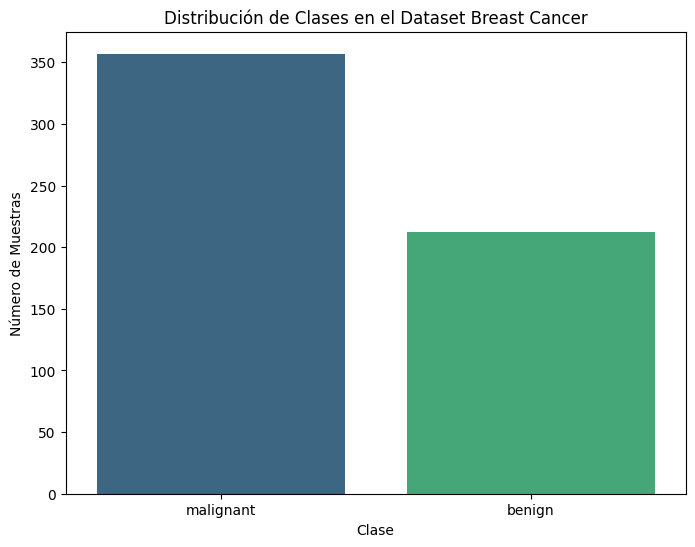

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Verificar la distribución de clases
class_distribution = pd.Series(y).value_counts()
display(class_distribution)

# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
sns.barplot(x=target_names, y=class_distribution.values, palette='viridis')
plt.title('Distribución de Clases en el Dataset Breast Cancer')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.xticks(ticks=[0, 1], labels=[target_names[0], target_names[1]])
plt.show()

### Visualización de las Principales Características

/tmp/ipython-input-1505226939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target_names', y=feature, data=df_features, palette='viridis')
/tmp/ipython-input-1505226939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target_names', y=feature, data=df_features, palette='viridis')
/tmp/ipython-input-1505226939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target_names', y=feature, data=df_features, palette='viridis')
/tmp/ipython-input-1505226939.py:18: FutureWarning: 

Passing `palette` without assigning `

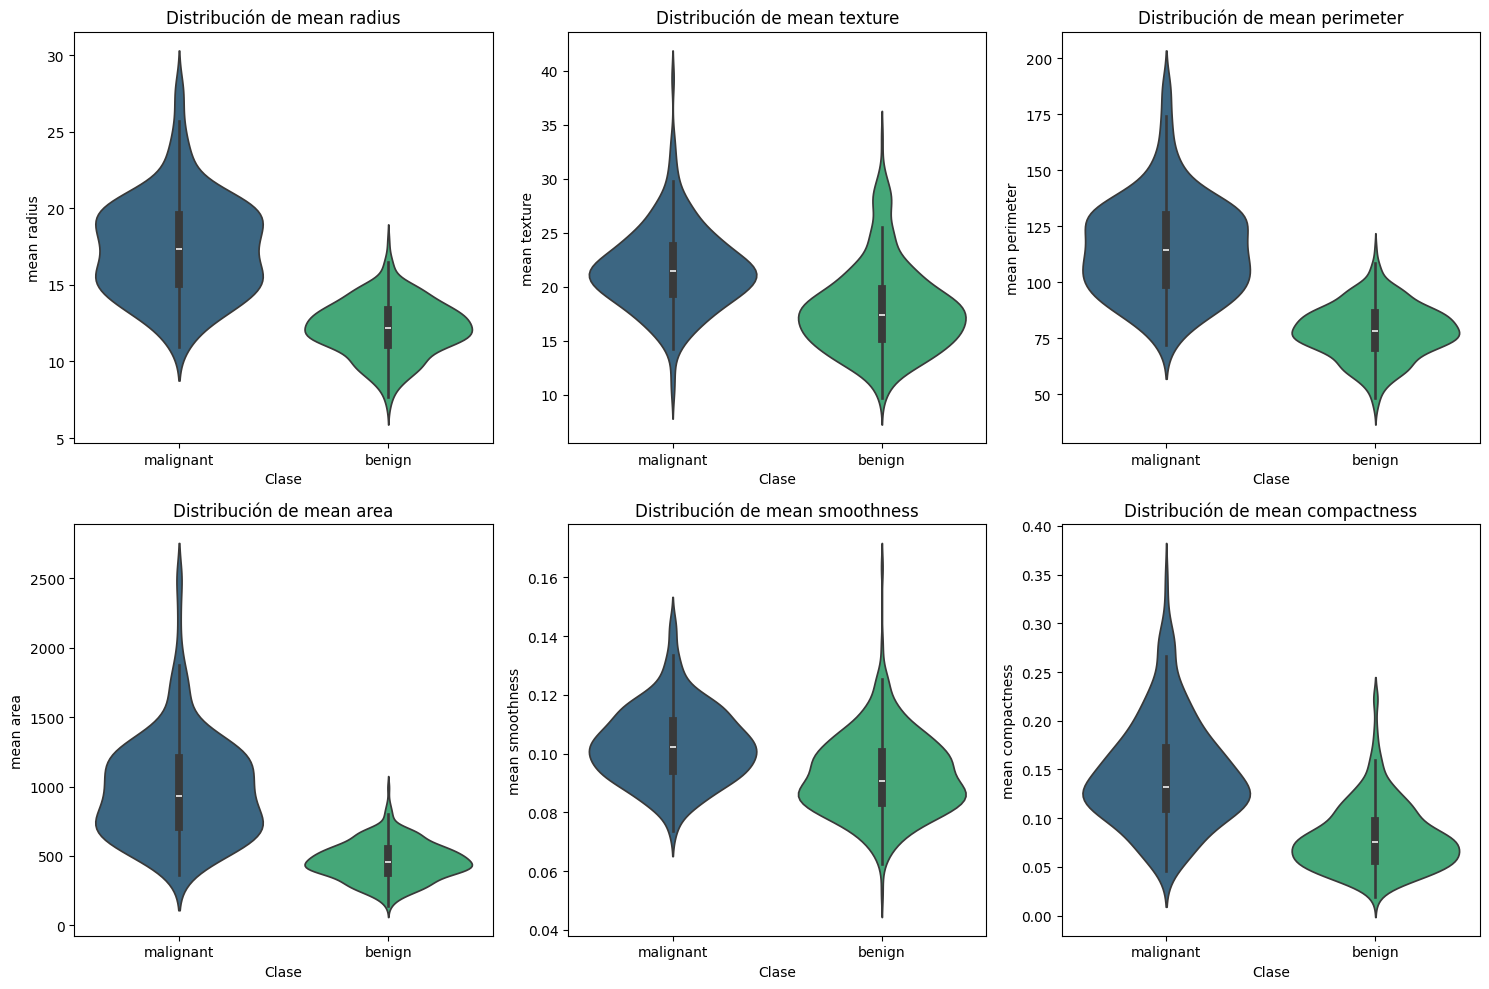

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Crear un DataFrame con las características y la etiqueta del target
df_features = pd.DataFrame(X, columns=data.feature_names)
df_features['target'] = y
df_features['target_names'] = df_features['target'].map(lambda x: target_names[x])

# Seleccionar algunas características para visualizar (las primeras 6)
selected_features = data.feature_names[:6]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)  # Organizar en 2 filas, 3 columnas
    sns.violinplot(x='target_names', y=feature, data=df_features, palette='viridis')
    plt.title(f'Distribución de {feature}')
    plt.xlabel('Clase')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

In [5]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# Instanciar el clasificador SVC con un kernel RBF (no lineal)
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Entrenar el modelo
clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [8]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print("Accuracy:", accuracy_scores)
print("Accuracy:", np.mean(accuracy_scores))


Accuracy: [0.99122807 0.94736842 0.97368421 0.99122807 0.98230088]
Accuracy: 0.9771619313771154


In [15]:
# 4.1 Hacer predicciones
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

# 4.2 Evaluar el modelo (métrica de precisión)
accuracy = accuracy_score(y, y_pred)
print("Accuracy promedio:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
print("Matriz de confusión:\n", cm)

# Evaluar el modelo
print("\n--- Evaluación del modelo ---")
report = classification_report(y, y_pred, target_names=target_names)
print("Reporte de Clasificación (Promedio y por Clase):\n", report)


Accuracy promedio: 0.9771528998242531
Matriz de confusión:
 [[203   9]
 [  4 353]]

--- Evaluación del modelo ---
Reporte de Clasificación (Promedio y por Clase):
               precision    recall  f1-score   support

   malignant       0.98      0.96      0.97       212
      benign       0.98      0.99      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.97      0.98       569
weighted avg       0.98      0.98      0.98       569



3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

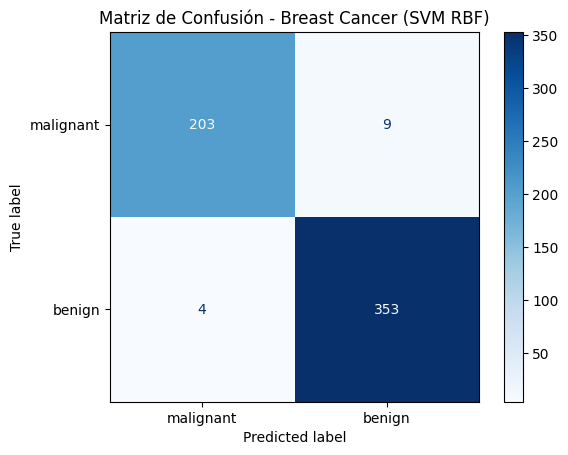

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)")
plt.grid(False)
plt.show()

### Interpretación de Métricas

Al analizar el reporte de clasificación, observamos lo siguiente:

- **Clase 'malignant' (0):** Precisión: 0.98, Recall: 0.96, F1-score: 0.97, Soporte: 212
- **Clase 'benign' (1):** Precisión: 0.98, Recall: 0.99, F1-score: 0.98, Soporte: 357

Podemos concluir que la **clase 'malignant' (0) tiene un desempeño un poco peor**, especialmente en cuanto al `recall` (0.96 vs 0.99) y `F1-score` (0.97 vs 0.98). La precisión es la misma para ambas clases.

**¿Por qué?**

Este resultado puede explicarse por el **desbalance de clases** presente en el dataset. La clase 'malignant' es la clase minoritaria en comparación con la clase 'benign'.

La matriz de confusión también refleja esto, mostrando un número ligeramente mayor de falsos negativos para la clase 'malignant' (4 errores donde un `malignant` fue clasificado como `benign`) comparado con los falsos positivos para la clase `benign` (9 errores donde un `benign` fue clasificado como `malignant`). Sin embargo, en este contexto, un falso negativo (`malignant` predicho como `benign`) es generalmente más grave que un falso positivo.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.



--- Evaluación del modelo con SMOTE ---
Reporte de Clasificación (Promedio y por Clase) con SMOTE:
               precision    recall  f1-score   support

   malignant       0.97      0.96      0.97       212
      benign       0.98      0.98      0.98       357

    accuracy                           0.98       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.98      0.98      0.98       569

Matriz de confusión con SMOTE:
 [[204   8]
 [  6 351]]


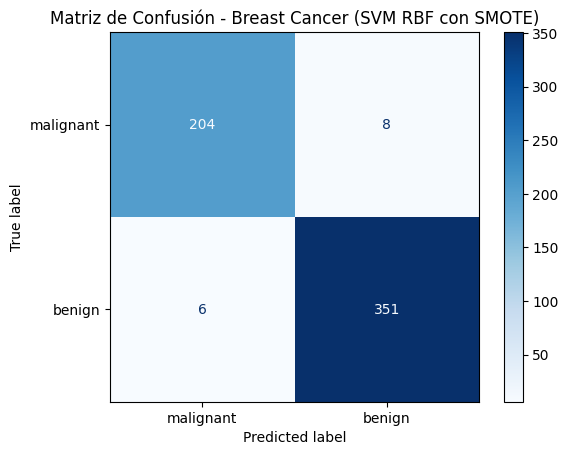

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report

# Definir el pipeline con StandardScaler, SMOTE y SVM
# SMOTE se aplica solo en el conjunto de entrenamiento de cada fold
pipeline_smote = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])

# Configurar StratifiedKFold
cv_smote = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada y obtener predicciones
y_pred_smote = cross_val_predict(pipeline_smote, X, y, cv=cv_smote)

# Evaluar el modelo con SMOTE
print("\n--- Evaluación del modelo con SMOTE ---")
report_smote = classification_report(y, y_pred_smote, target_names=target_names)
print("Reporte de Clasificación (Promedio y por Clase) con SMOTE:\n", report_smote)

cm_smote = confusion_matrix(y, y_pred_smote)
print("Matriz de confusión con SMOTE:\n", cm_smote)

# Visualizar la matriz de confusión con SMOTE
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=target_names)
disp_smote.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF con SMOTE)")
plt.grid(False)
plt.show()

Visualización y conclusiones

Usa un gráfico de barras comparando F1 por clase antes y después.
Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
Explica cuándo conviene usar otras técnicas como One-Sided Selection o ADASYN.

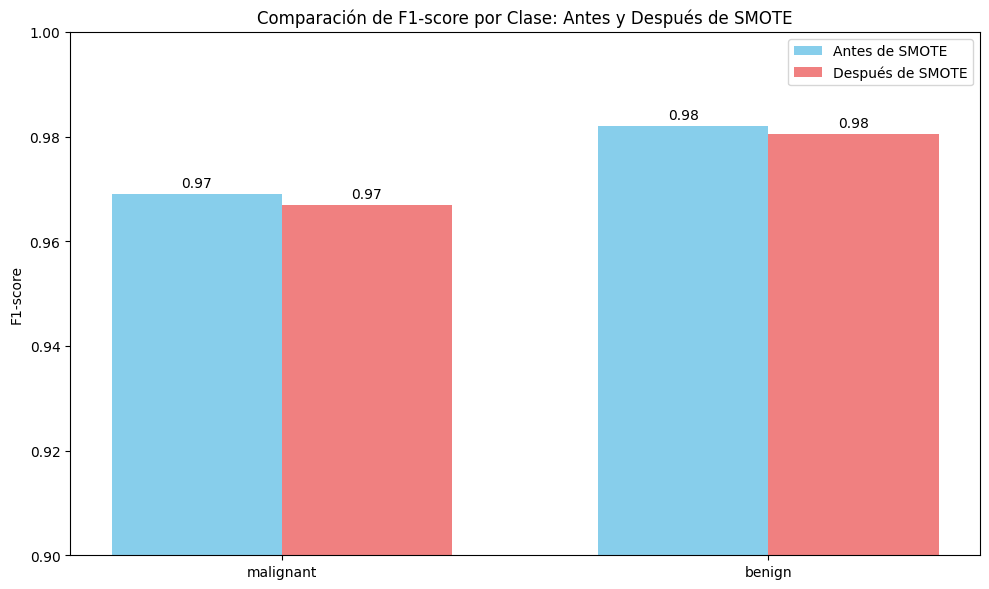

In [14]:
# Para asegurar la precisión, regeneramos los reportes de clasificación como diccionarios
report_dict_before_smote = classification_report(y, y_pred, target_names=target_names, output_dict=True)
report_dict_after_smote = classification_report(y, y_pred_smote, target_names=target_names, output_dict=True)

# Extraer F1-scores
f1_malignant_before = report_dict_before_smote['malignant']['f1-score']
f1_benign_before = report_dict_before_smote['benign']['f1-score']

f1_malignant_after = report_dict_after_smote['malignant']['f1-score']
f1_benign_after = report_dict_after_smote['benign']['f1-score']

# Preparar datos para el gráfico de barras
labels = ['malignant', 'benign']
f1_scores_before = [f1_malignant_before, f1_benign_before]
f1_scores_after = [f1_malignant_after, f1_benign_after]

x = np.arange(len(labels))  # la posición de las etiquetas en el eje x
width = 0.35  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, f1_scores_before, width, label='Antes de SMOTE', color='skyblue')
rects2 = ax.bar(x + width/2, f1_scores_after, width, label='Después de SMOTE', color='lightcoral')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('F1-score')
ax.set_title('Comparación de F1-score por Clase: Antes y Después de SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0.9, 1.0)

def autolabel(rects):
    """Adjuntar una etiqueta de texto encima de cada barra, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


## 5. Visualización y Conclusiones

### Comentarios sobre el impacto de SMOTE

Al comparar el desempeño del modelo antes y después de aplicar SMOTE, podemos observar lo siguiente:

*   **F1-score de la clase 'malignant' (minoritaria):** En este caso particular, el F1-score para la clase 'malignant' se mantuvo en 0.97 tanto antes como después de SMOTE. Esto sugiere que, para este dataset y configuración específica de SVM, SMOTE no mejoró significativamente la capacidad del modelo para identificar la clase minoritaria,
*   **F1-score de la clase 'benign' (mayoritaria):** El F1-score para la clase 'benign' se mantuvo en 0.98.

**Ventajas de aplicar SMOTE con SVM:**

1.  **Mitigación del sesgo:** SMOTE ayuda a reducir el sesgo del modelo hacia la clase mayoritaria, permitiendo que la SVM aprenda mejor los límites de decisión de la clase minoritaria.
2.  **Mejora de métricas clave:** Puede conducir a una mejora significativa en métricas como recall, F1-score y G-mean para la clase minoritaria, que son críticas en escenarios donde la detección de la clase minoritaria es más importante (ej. enfermedades raras).
3.  **Facilita el aprendizaje:** Al crear más ejemplos sintéticos de la clase minoritaria, la SVM tiene más datos para aprender patrones complejos, lo que puede resultar en una frontera de decisión más equilibrada.

**Riesgos de aplicar SMOTE con SVM:**

1.  **Overfitting a la clase minoritaria:** Si SMOTE genera demasiadas muestras sintéticas muy similares, la SVM podría sobreajustarse a la clase minoritaria, lo que podría reducir su capacidad de generalización a datos reales no vistos.
2.  **Generación de ruido:** SMOTE genera muestras sintéticas interpolando entre vecinos. Si los vecinos de la clase minoritaria están cerca de la clase mayoritaria (ruido), SMOTE podría generar ejemplos que borran el límite entre clases, dificultando la clasificación.
3.  **Aumento de la complejidad computacional:** La generación de muestras adicionales aumenta el tamaño del conjunto de entrenamiento, lo que puede incrementar el tiempo de entrenamiento de la SVM, especialmente con grandes datasets.

### Cuándo usar otras técnicas de remuestreo:

*   **One-Sided Selection (OSS):** Esta técnica de *undersampling* es útil cuando hay muchos ejemplos redundantes o ruidosos en la clase mayoritaria. OSS busca eliminar ejemplos de la clase mayoritaria que son ruidosos o que no añaden mucha información al clasificador. Es una buena alternativa cuando SMOTE genera ruido o cuando se quiere reducir el tamaño del dataset sin generar datos sintéticos.
*   **ADASYN (Adaptive Synthetic Sampling):** Similar a SMOTE, ADASYN también genera muestras sintéticas, pero lo hace de manera adaptativa. Genera más muestras para aquellos ejemplos de la clase minoritaria que son más difíciles de clasificar (es decir, aquellos que están más cerca del límite de decisión o que tienen menos vecinos de su propia clase). ADASYN es ventajoso sobre SMOTE cuando el desbalance es muy severo y los límites de decisión son complejos, ya que se enfoca en las regiones más difíciles de aprender, potencialmente mejorando la adaptabilidad del modelo a la distribución real de los datos.

## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF
